<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_Copy_of_Copy_of_fft_r1_model_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-3-r1.csv?token=AKVFSOEVHMKCJQ65CFLMYI26ZJG32')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
1,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1
2,216,2,4,1,1,4,3,9,0,0,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1
3,342,2,4,1,1,4,3,9,0,0,23,7,8,4,1,0.250000,8,1,1,1,1,1,8,1,4,32,3,27,9,1
4,388,1,2,1,1,4,3,9,3,3,21,5,9,3,2,0.666667,12,1,1,1,1,1,2,1,4,36,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,3268816,4,2,6,2,2,3,9,18,2,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1
56913,3268823,4,2,6,3,2,3,9,18,2,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1
56914,3268830,4,2,6,4,2,3,9,18,2,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1
56915,3268837,4,2,6,5,3,3,9,18,2,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-1-r1.csv?token=AKVFSODBXB5IUCFE6ERSQMC6ZJG32')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-6-r1.csv?token=AKVFSOGMU5OD4YODOXGQVU26ZJG36')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-9-r1.csv?token=AKVFSOFB72UAJ6OIWSC6RXS6ZJXTK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-14-r1.csv?token=AKVFSOG5FLJP4JXI2E2QCES6ZJG64')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-12-r1.csv?token=AKVFSOFBTOXQTACUR6HO4S26ZKC7W')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-15-r1.csv?token=AKVFSOBIOD6U4H3T63VAP4K6ZKC72')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-5-r1.csv?token=AKVFSOFQLXJBX5OKN64XFBC6ZKC76')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(127850, 30)
(69441, 30)
(69896, 30)
(69041, 30)
(46088, 30)
(45531, 30)
(46627, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9,0
3,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
4,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531386,3275300,4,2,6,2,2,3,9,18,2,20,4,20057,3,1,0.333333,15,1,1,1,1,1,8,12,24,481368,18,27,54,1
531387,3275307,4,2,6,3,2,3,9,18,2,20,4,20057,3,1,0.333333,22,1,1,1,1,1,8,18,36,722052,18,27,54,1
531388,3275314,4,2,6,4,2,3,9,18,2,20,4,20057,3,1,0.333333,29,1,1,1,1,1,8,24,48,962736,18,27,54,1
531389,3275321,4,2,6,5,3,3,9,18,2,20,4,20057,3,1,0.333333,36,1,1,1,1,1,8,30,90,1805130,18,27,54,1


In [0]:
df.shape

(531391, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-13-r1.csv?token=AKVFSOBJ6YDCG2K3JNTO6O26ZJJBG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-2-r1.csv?token=AKVFSOCVXJ5DH3YNIWVYOHS6ZJ52G')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-5-r1.csv?token=AKVFSOFBHZKQTCCGUNRVDUC6ZJ52K')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-10-r1.csv?token=AKVFSOEN6ZF5ZVFFYY6NGRC6ZJ52S')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-12-r1.csv?token=AKVFSOBETR5ER5HO2377XD26ZJ52W')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-15-r1.csv?token=AKVFSOHJX2J2JISMXV7YH626ZJ526')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-10-r1.csv?token=AKVFSOGUBLR43HE4EX4QCE26ZKDGA')
df5.shape

(70287, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
1,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,0
2,238,2,4,1,1,4,3,9,0,0,22,6,9,3,1,0.333333,8,1,1,1,1,1,8,1,4,36,3,27,9,0
3,365,2,4,1,1,4,3,9,0,0,23,7,12,4,1,0.250000,8,1,1,1,1,1,8,1,4,48,3,27,9,0
4,386,1,2,1,1,4,3,9,3,3,21,5,13,3,2,0.666667,12,1,1,1,1,1,2,1,4,52,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,3270654,2,4,1,1,4,3,10,0,0,22,6,30075,3,1,0.333333,36,1,6,6,6,36,8,1,4,120300,3,30,9,0
70283,3270850,2,4,5,1,1,3,9,0,0,27,11,30076,5,1,0.200000,8,1,1,1,1,1,8,5,5,150380,15,27,45,0
70284,3270857,2,4,5,2,2,3,9,0,0,27,11,30076,5,1,0.200000,15,3,1,3,3,9,8,10,20,601520,15,27,45,0
70285,3270864,2,4,5,3,2,3,9,0,0,27,11,30076,5,1,0.200000,22,2,2,3,4,12,8,15,30,902280,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.283794,0.249796,0.010972,-0.016441,-0.341203,-0.212344,-0.026598,0.193748,-0.311793,-0.591126,0.026997,-0.074311,0.082272,0.005181,0.020598,0.013087,0.448231,0.135027,0.108110,0.058663,0.122597,-0.293661,-0.060679,0.042431
inport,-0.283794,1.000000,-0.150890,0.038514,-0.057710,-0.190019,-0.370781,-0.007501,0.294081,0.078460,0.146488,0.128277,-0.087022,-0.210935,-0.193887,-0.168150,-0.141803,0.606371,-0.022369,-0.036229,-0.026488,-0.213641,-0.273561,-0.253695,0.196036
cache_coherence_type,0.249796,-0.150890,1.000000,0.358470,-0.537140,-0.100960,-0.162716,-0.005786,-0.050933,-0.095314,-0.136085,-0.431328,0.054094,-0.043558,0.006856,0.020565,0.017998,0.029614,0.542619,0.433807,0.297626,0.936533,-0.130410,0.684270,0.020003
flit_id,0.010972,0.038514,0.358470,1.000000,-0.044075,0.067610,-0.034490,0.020484,0.042456,0.011976,-0.012576,0.509396,0.023475,0.038034,0.040025,0.056296,0.035389,0.029703,0.968526,0.930921,0.677676,0.372296,0.024831,0.321374,-0.010627
flit_type,-0.016441,-0.057710,-0.537140,-0.044075,1.000000,-0.101308,0.051681,-0.030694,-0.063616,-0.017945,0.018844,0.543490,-0.133615,0.168193,0.022501,-0.010645,-0.009440,-0.044508,-0.138300,0.118592,0.080204,-0.557858,-0.037207,-0.481554,0.015924
vnet,-0.341203,-0.190019,-0.100960,0.067610,-0.101308,1.000000,0.900647,0.054448,-0.046650,0.403505,0.405989,-0.099919,0.103165,0.088485,0.124711,0.091774,0.067688,-0.275104,-0.023494,-0.028429,0.005905,0.254235,0.981915,0.656419,-0.174510
vc,-0.212344,-0.370781,-0.162716,-0.034490,0.051681,0.900647,1.000000,0.042712,-0.149549,0.211618,0.221770,-0.089190,0.091510,0.168665,0.169301,0.132065,0.105011,-0.392436,-0.112002,-0.082233,-0.041306,0.159191,0.966629,0.536767,-0.179336
traversal_id,-0.026598,-0.007501,-0.005786,0.020484,-0.030694,0.054448,0.042712,1.000000,0.075617,0.024057,-0.016381,0.016745,0.118472,0.118527,0.154220,0.117103,0.090641,-0.001130,0.007142,0.002540,0.541334,0.013562,0.050707,0.035522,-0.301488
hop_count,0.193748,0.294081,-0.050933,0.042456,-0.063616,-0.046650,-0.149549,0.075617,1.000000,0.367847,-0.171372,0.184512,-0.103530,-0.079439,-0.119061,-0.110882,-0.105412,0.566620,0.021800,0.002187,0.041345,-0.065951,-0.092656,-0.072815,0.034998
current_hop,-0.311793,0.078460,-0.095314,0.011976,-0.017945,0.403505,0.211618,0.024057,0.367847,1.000000,0.749708,0.211397,0.029774,-0.070522,-0.026515,-0.037488,-0.035557,0.100677,-0.043728,-0.037423,-0.013484,0.049531,0.330073,0.223485,-0.052092


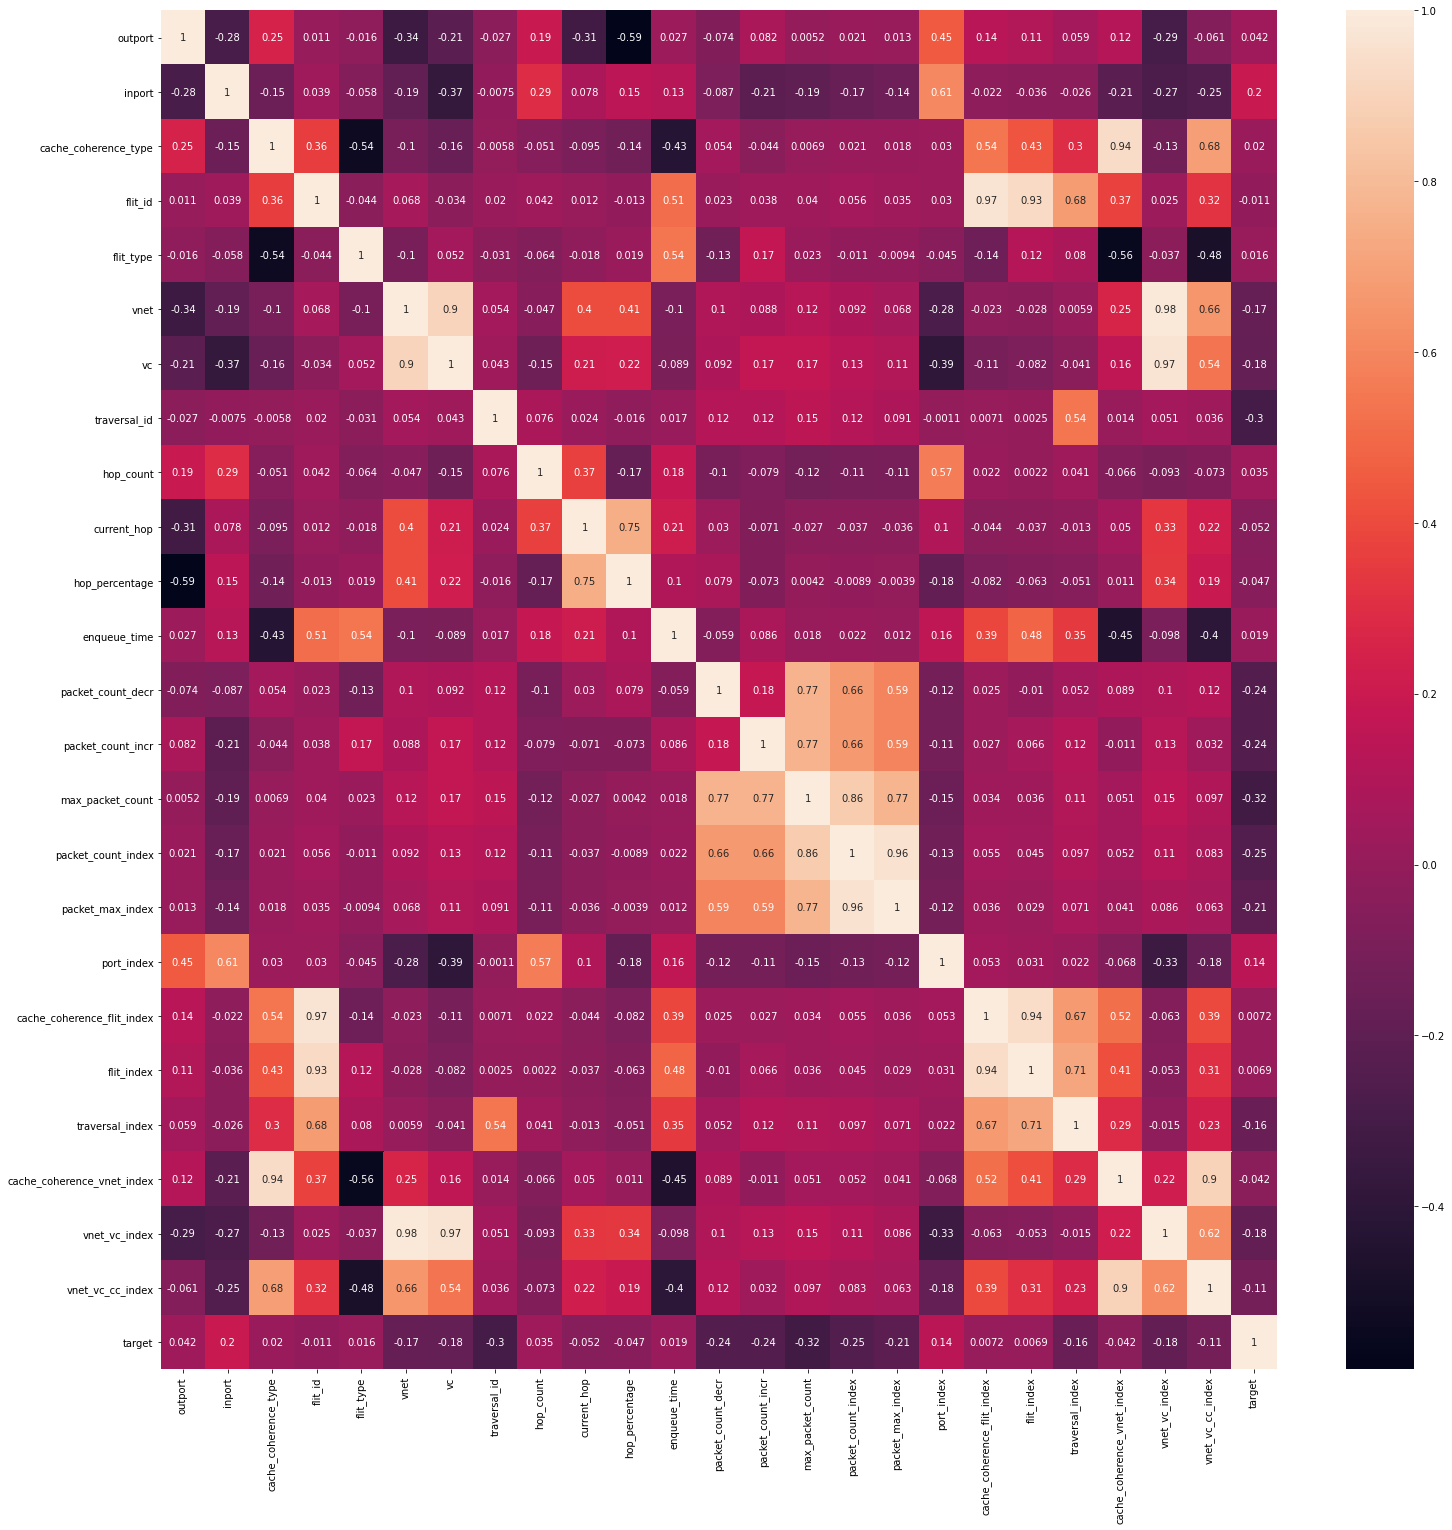

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9
3,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
4,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531386,4,2,6,2,2,3,9,20057,3,1,0.333333,15,1,1,1,1,1,8,12,24,481368,18,27,54
531387,4,2,6,3,2,3,9,20057,3,1,0.333333,22,1,1,1,1,1,8,18,36,722052,18,27,54
531388,4,2,6,4,2,3,9,20057,3,1,0.333333,29,1,1,1,1,1,8,24,48,962736,18,27,54
531389,4,2,6,5,3,3,9,20057,3,1,0.333333,36,1,1,1,1,1,8,30,90,1805130,18,27,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531386,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000,0.666578,0.500000,0.2,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.177762,0.833333,0.000000,0.494505
531387,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000,0.666578,0.500000,0.2,0.333333,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.266643,0.833333,0.000000,0.494505
531388,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000,0.666578,0.500000,0.2,0.333333,0.378788,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.355525,0.833333,0.000000,0.494505
531389,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000,0.666578,0.500000,0.2,0.333333,0.484848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.666611,0.833333,0.000000,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(18164, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.666667,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,0.50,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.999967,0.4,0.333333,0.333333,0.500000,0.000000,0.172414,0.172414,0.020921,0.004862,1.00,0.000000,0.000000,0.044449,0.000000,0.333333,0.000000
70283,0.50,1.0,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.137931,0.011628,0.055563,0.666667,0.000000,0.666667
70284,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.171875,0.068966,0.000000,0.068966,0.008368,0.001111,1.00,0.310345,0.186047,0.222258,0.666667,0.000000,0.666667
70285,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.281250,0.034483,0.034483,0.068966,0.012552,0.001528,1.00,0.482759,0.302326,0.333388,0.666667,0.000000,0.666667


In [0]:
test_X[test_X.duplicated()].shape

(56, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(61, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,1.0,0.400000,0.126984,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000133,0.6,0.5,0.250000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.5,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80882,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.174603,0.133333,0.033333,0.166667,0.035294,0.007435,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
80883,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.285714,0.100000,0.066667,0.166667,0.043137,0.008948,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
80884,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.396825,0.066667,0.100000,0.166667,0.043137,0.008948,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
80885,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.507937,0.033333,0.133333,0.166667,0.035294,0.007435,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(40, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,1.0,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.5,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.5,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,1.0,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69891,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.171875,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69892,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.281250,0.107143,0.000000,0.107143,0.013393,0.002299,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69893,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.390625,0.071429,0.035714,0.107143,0.022321,0.003525,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69894,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.500000,0.035714,0.071429,0.107143,0.022321,0.003525,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(49, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.030303,0.000000,0.030303,0.003279,0.000288,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.666667,0.400000,0.125000,0.000000,0.030303,0.030303,0.003279,0.000288,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69036,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.171875,0.121212,0.030303,0.151515,0.029508,0.005671,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69037,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.281250,0.090909,0.060606,0.151515,0.036066,0.006825,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69038,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.390625,0.060606,0.090909,0.151515,0.036066,0.006825,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69039,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.500000,0.030303,0.121212,0.151515,0.029508,0.005671,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.4,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69994,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69995,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
69996,1.00,0.5,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.4,0.2,0.333333,0.500000,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.034483,0.046512,0.088890,0.166667,0.333333,0.166667


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(55, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.4,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69448,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.171875,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69449,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69450,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69451,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000249,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000349,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000449,0.2,0.333333,0.500000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000499,0.4,1.000000,1.000000,0.187500,0.043478,0.000000,0.043478,0.006452,0.000801,0.0,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786,0.50,1.00,0.666667,0.25,0.333333,0.0,0.000000,0.999950,0.8,0.333333,0.200000,0.171875,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.310345,0.186047,0.222265,0.666667,0.000000,0.666667
45787,0.50,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.999950,0.8,0.333333,0.200000,0.281250,0.130435,0.000000,0.130435,0.019355,0.004007,1.0,0.482759,0.302326,0.333398,0.666667,0.000000,0.666667
45788,0.50,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999950,0.8,0.333333,0.200000,0.390625,0.086957,0.043478,0.130435,0.032258,0.006145,1.0,0.655172,0.418605,0.444532,0.666667,0.000000,0.666667
45789,0.50,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999950,0.8,0.333333,0.200000,0.500000,0.043478,0.086957,0.130435,0.032258,0.006145,1.0,0.827586,0.825581,0.833499,0.666667,0.000000,0.666667


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    336228
1    195163
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
5                         vnet  12228.525557
22               vnet_vc_index   8947.044831
14            max_packet_count   8577.296663
6                           vc   6747.711096
7                 traversal_id   6256.185001
13           packet_count_incr   4292.906256
12           packet_count_decr   4284.392263
1                       inport   4093.442245
15          packet_count_index   3537.128161
17                  port_index   3293.146574
16            packet_max_index   2089.249368
20             traversal_index   1976.632647
23            vnet_vc_cc_index    586.828932
10              hop_percentage    227.670627
0                      outport    186.285766
9                  current_hop    148.793620
21  cache_coherence_vnet_index     90.825772


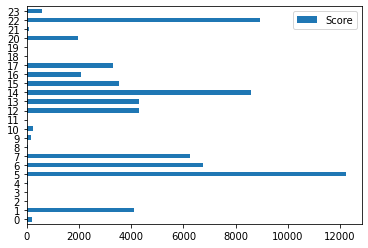

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 71.69263629349442
Test Prediction  71.79593334525165


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.46085335837353


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  77.75167826721228


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.36900537942086


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  83.19838936284238


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.20263436098173


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.10257296301096


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  24.838942150204186


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
18,cache_coherence_flit_index,3.771691
1,inport,2.526075
15,packet_count_index,2.181393
2,cache_coherence_type,2.080218
9,current_hop,1.960648
6,vc,1.653922
0,outport,1.064751
4,flit_type,0.525244
11,enqueue_time,0.382983
20,traversal_index,0.074989


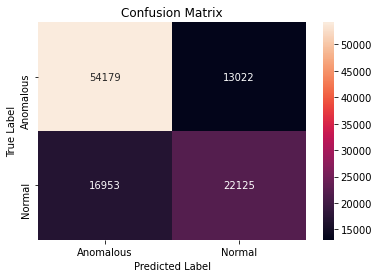

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     67201
           1       0.63      0.57      0.60     39078

    accuracy                           0.72    106279
   macro avg       0.70      0.69      0.69    106279
weighted avg       0.71      0.72      0.71    106279



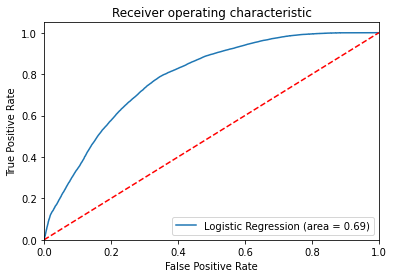

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

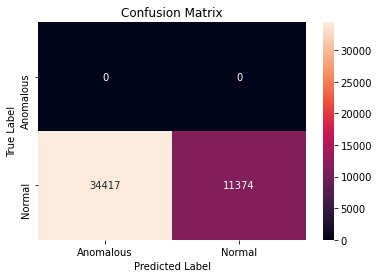

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40     45791

    accuracy                           0.25     45791
   macro avg       0.50      0.12      0.20     45791
weighted avg       1.00      0.25      0.40     45791



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 89.13627467585013
Test Prediction  83.90933298205667


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.10714641398836


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.45920852547381


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  82.93607645644958


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  85.49847192248085


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  81.19231978056516


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  82.34633493153643


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  22.28822257648883


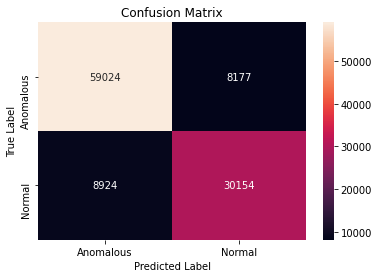

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     67201
           1       0.79      0.77      0.78     39078

    accuracy                           0.84    106279
   macro avg       0.83      0.82      0.83    106279
weighted avg       0.84      0.84      0.84    106279



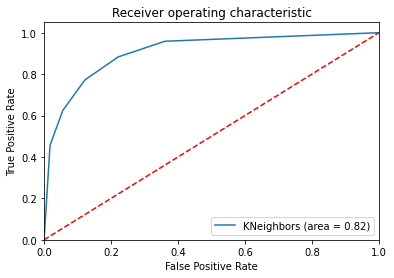

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

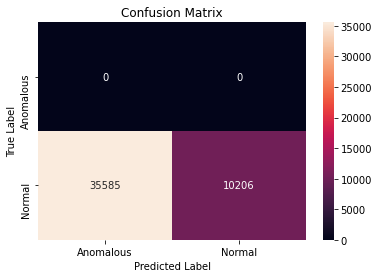

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.22      0.36     45791

    accuracy                           0.22     45791
   macro avg       0.50      0.11      0.18     45791
weighted avg       1.00      0.22      0.36     45791



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 50.18230489847382
Test Prediction Score 50.48128040346634


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 40.02447109707343


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.651452025665435


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.69606272175804


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.97256702539071


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.34109545987028


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.07466920075447


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  66.36675329213165


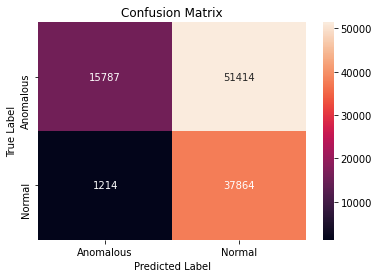

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.23      0.37     67201
           1       0.42      0.97      0.59     39078

    accuracy                           0.50    106279
   macro avg       0.68      0.60      0.48    106279
weighted avg       0.74      0.50      0.45    106279



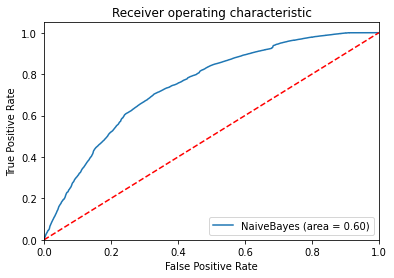

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 340089 samples, validate on 85023 samples
Epoch 1/10
340089/340089 [==============================] - 13s 38us/step - loss: 0.1859 - accuracy: 0.7095 - val_loss: 0.1801 - val_accuracy: 0.7209
Epoch 2/10
340089/340089 [==============================] - 12s 36us/step - loss: 0.1812 - accuracy: 0.7186 - val_loss: 0.1794 - val_accuracy: 0.7234
Epoch 3/10
340089/340089 [==============================] - 13s 37us/step - loss: 0.1807 - accuracy: 0.7197 - val_loss: 0.1793 - val_accuracy: 0.7197
Epoch 4/10
340089/340089 [==============================] - 13s 37us/step - loss: 0.1805 - accuracy: 0.7198 - val_loss: 0.1799 - val_accuracy: 0.7197
Epoch 5/10
340089/340089 [==============================] - 13s 37us/step - loss: 0.1804 - accuracy: 0.7197 - val_loss: 0.1791 - val_accuracy: 0.7231
Epoch 6/10
340089/340089 [==============================] - 13s 37us/step - loss: 0.1804 - accuracy: 0.7200 - val_loss: 0.1790 - val_accuracy: 0.7233
Epoch 7/10
340089/340089 [=======================

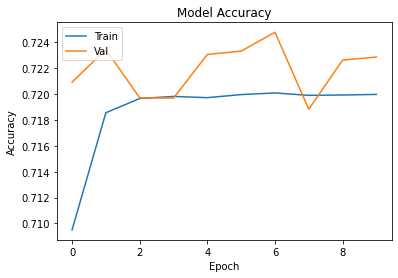

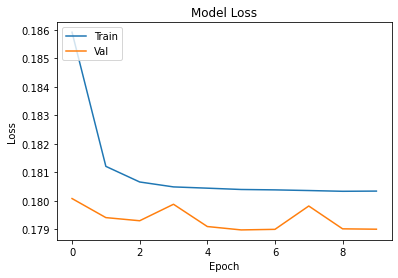

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.21%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.24%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.94%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.06%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.80%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.59%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.41%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 43.89%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 340089 samples, validate on 85023 samples
Epoch 1/30
340089/340089 [==============================] - 13s 37us/step - loss: 0.2081 - accuracy: 0.6578 - val_loss: 0.1862 - val_accuracy: 0.7056
Epoch 2/30
340089/340089 [==============================] - 13s 37us/step - loss: 0.1847 - accuracy: 0.7122 - val_loss: 0.1818 - val_accuracy: 0.7162
Epoch 3/30
340089/340089 [==============================] - 13s 37us/step - loss: 0.1829 - accuracy: 0.7148 - val_loss: 0.1809 - val_accuracy: 0.7197
Epoch 4/30
340089/340089 [==============================] - 13s 37us/step - loss: 0.1820 - accuracy: 0.7155 - val_loss: 0.1807 - val_accuracy: 0.7216
Epoch 5/30
340089/340089 [==============================] - 12s 37us/step - loss: 0.1815 - accuracy: 0.7163 - val_loss: 0.1799 - val_accuracy: 0.7199
Epoch 6/30
340089/340089 [==============================] - 12s 37us/step - loss: 0.1811 - accuracy: 0.7171 - val_loss: 0.1796 - val_accuracy: 0.7205
Epoch 7/30
340089/340089 [=======================

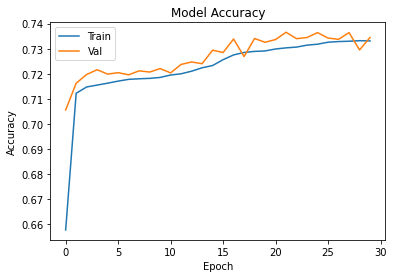

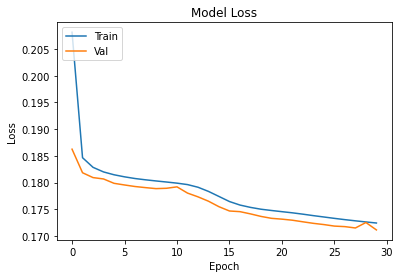

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.44%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.60%
accuracy: 67.78%
accuracy: 62.28%
accuracy: 73.73%
accuracy: 87.98%
accuracy: 87.81%
accuracy: 38.35%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 340089 samples, validate on 85023 samples
Epoch 1/30
340089/340089 [==============================] - 13s 38us/step - loss: 0.2330 - accuracy: 0.6325 - val_loss: 0.2318 - val_accuracy: 0.6343
Epoch 2/30
340089/340089 [==============================] - 13s 40us/step - loss: 0.2322 - accuracy: 0.6325 - val_loss: 0.2317 - val_accuracy: 0.6343
Epoch 3/30
340089/340089 [==============================] - 13s 38us/step - loss: 0.2232 - accuracy: 0.6446 - val_loss: 0.1976 - val_accuracy: 0.6980
Epoch 4/30
340089/340089 [==============================] - 14s 42us/step - loss: 0.1885 - accuracy: 0.7110 - val_loss: 0.1832 - val_accuracy: 0.7223
Epoch 5/30
340089/340089 [==============================] - 13s 38us/step - loss: 0.1835 - accuracy: 0.7186 - val_loss: 0.1811 - val_accuracy: 0.7200
Epoch 6/30
340089/340089 [==============================] - 13s 38us/step - loss: 0.1819 - accuracy: 0.7176 - val_loss: 0.1800 - val_accuracy: 0.7192
Epoch 7/30
340089/340089 [=======================

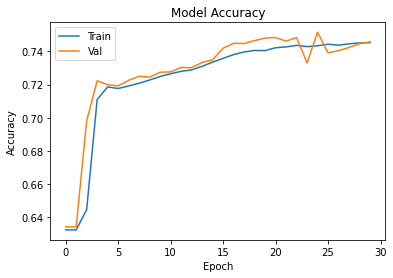

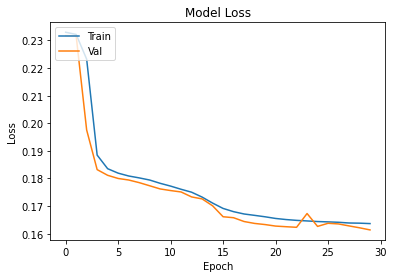

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.46%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.02%
accuracy: 42.10%
accuracy: 38.02%
accuracy: 52.75%
accuracy: 76.75%
accuracy: 76.93%
accuracy: 55.59%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 340089 samples, validate on 85023 samples
Epoch 1/100
340089/340089 [==============================] - 25s 74us/step - loss: 0.1662 - accuracy: 0.7432 - val_loss: 0.1509 - val_accuracy: 0.7697
Epoch 2/100
340089/340089 [==============================] - 28s 82us/step - loss: 0.1566 - accuracy: 0.7602 - val_loss: 0.1447 - val_accuracy: 0.7793
Epoch 3/100
340089/340089 [==============================] - 27s 80us/step - loss: 0.1524 - accuracy: 0.7690 - val_loss: 0.1413 - val_accuracy: 0.7926
Epoch 4/100
340089/340089 [==============================] - 27s 80us/step - loss: 0.1491 - accuracy: 0.7741 - val_loss: 0.1344 - val_accuracy: 0.8010
Epoch 5/100
340089/340089 [==============================] - 33s 97us/step - loss: 0.1459 - accuracy: 0.7789 - val_loss: 0.1341 - val_accuracy: 0.8043
Epoch 6/100
340089/340089 [==============================] - 27s 80us/step - loss: 0.1431 - accuracy: 0.7850 - val_loss: 0.1369 - val_accuracy: 0.7949
Epoch 7/100
340089/340089 [================

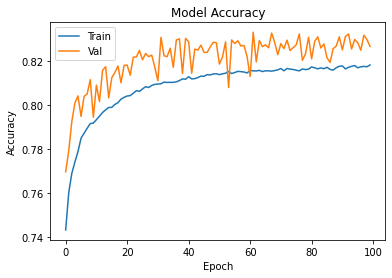

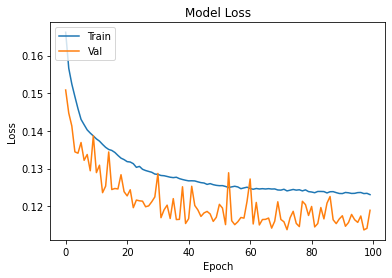

In [102]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [103]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.71%


In [104]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.99%
accuracy: 72.14%
accuracy: 68.15%
accuracy: 80.70%
accuracy: 72.98%
accuracy: 73.56%
accuracy: 25.61%


In [105]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 340089 samples, validate on 85023 samples
Epoch 1/50
340089/340089 [==============================] - 26s 77us/step - loss: 0.1648 - accuracy: 0.7454 - val_loss: 0.1497 - val_accuracy: 0.7649
Epoch 2/50
340089/340089 [==============================] - 26s 77us/step - loss: 0.1532 - accuracy: 0.7669 - val_loss: 0.1397 - val_accuracy: 0.7898
Epoch 3/50
340089/340089 [==============================] - 26s 76us/step - loss: 0.1482 - accuracy: 0.7747 - val_loss: 0.1427 - val_accuracy: 0.7806
Epoch 4/50
340089/340089 [==============================] - 26s 78us/step - loss: 0.1446 - accuracy: 0.7820 - val_loss: 0.1313 - val_accuracy: 0.8066
Epoch 5/50
340089/340089 [==============================] - 27s 78us/step - loss: 0.1421 - accuracy: 0.7862 - val_loss: 0.1331 - val_accuracy: 0.8030
Epoch 6/50
340089/340089 [==============================] - 26s 77us/step - loss: 0.1401 - accuracy: 0.7893 - val_loss: 0.1318 - val_accuracy: 0.8063
Epoch 7/50
340089/340089 [=======================

In [106]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.21%


In [107]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.48%
accuracy: 62.46%
accuracy: 57.32%
accuracy: 82.64%
accuracy: 78.32%
accuracy: 78.73%
accuracy: 22.96%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [111]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.25060689888782
Test Prediction Score 92.70222715682308


In [112]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.1226115782435
Test Prediction Score 75.57456698851485
Test Prediction Score 72.46623554995995
Test Prediction Score 84.56279601975638
Test Prediction Score 81.68233378096517
Test Prediction Score 80.87627604279153
Test Prediction Score 20.532419034308052


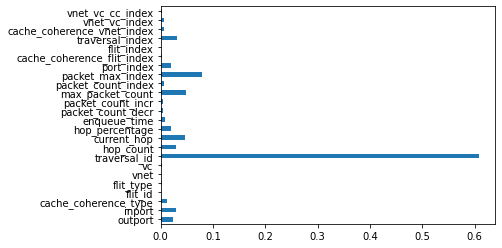

In [113]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

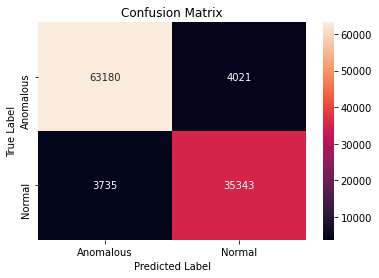

In [114]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [115]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     67201
           1       0.90      0.90      0.90     39078

    accuracy                           0.93    106279
   macro avg       0.92      0.92      0.92    106279
weighted avg       0.93      0.93      0.93    106279



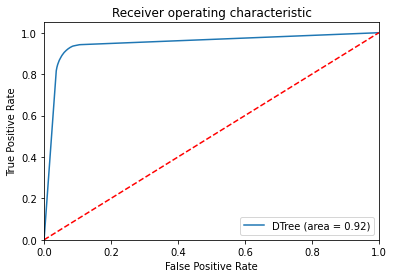

In [116]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [120]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.82830877509927
Test Prediction Score 93.77769832234026


In [121]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 88.10021767894489
Test Prediction Score 77.92475923201503
Test Prediction Score 74.35332493991072
Test Prediction Score 86.74266015845656
Test Prediction Score 83.54952998657105
Test Prediction Score 82.70485076238607
Test Prediction Score 20.049791443733483


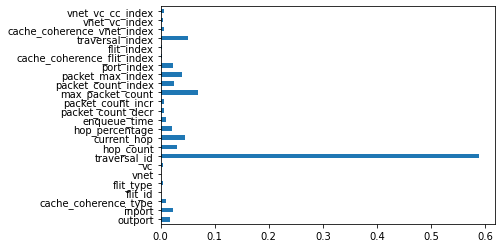

In [122]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

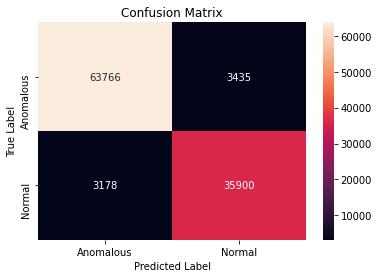

In [123]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [124]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     67201
           1       0.91      0.92      0.92     39078

    accuracy                           0.94    106279
   macro avg       0.93      0.93      0.93    106279
weighted avg       0.94      0.94      0.94    106279



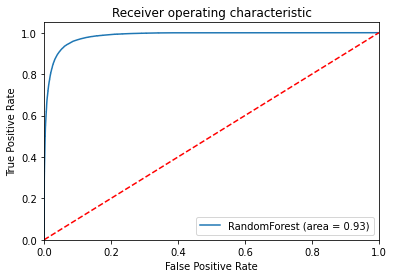

In [125]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [127]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [129]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.21244283859313
Test Prediction Score 95.38196633389475


In [130]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 90.92719848620655
Test Prediction Score 78.24372272429439
Test Prediction Score 74.42485979169051
Test Prediction Score 89.53085847539867
Test Prediction Score 83.51095745592731
Test Prediction Score 83.38732668135286
Test Prediction Score 18.114913410932278


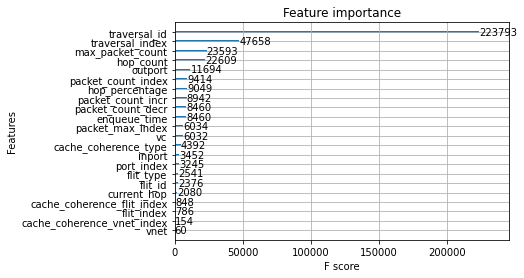

In [131]:
plot_importance(xgbc)
plt.show()

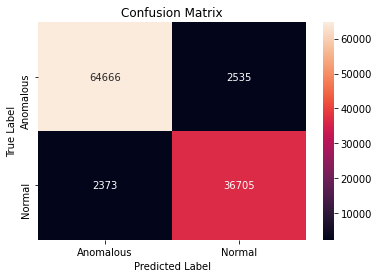

In [132]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     67201
           1       0.94      0.94      0.94     39078

    accuracy                           0.95    106279
   macro avg       0.95      0.95      0.95    106279
weighted avg       0.95      0.95      0.95    106279



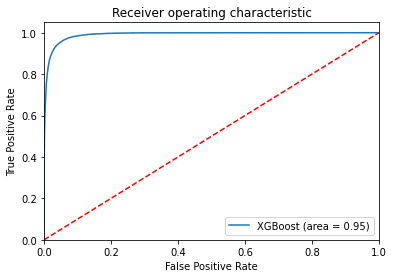

In [134]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [136]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [138]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.57007094600952
Test Prediction Score 87.84143621976119


In [139]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 89.78189423364206
Test Prediction Score 72.23781324563899
Test Prediction Score 68.59620006867347
Test Prediction Score 88.75450819078519
Test Prediction Score 80.56944484128118
Test Prediction Score 80.9367485925734
Test Prediction Score 19.442685243825206


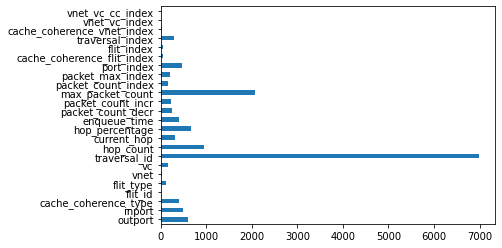

In [140]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

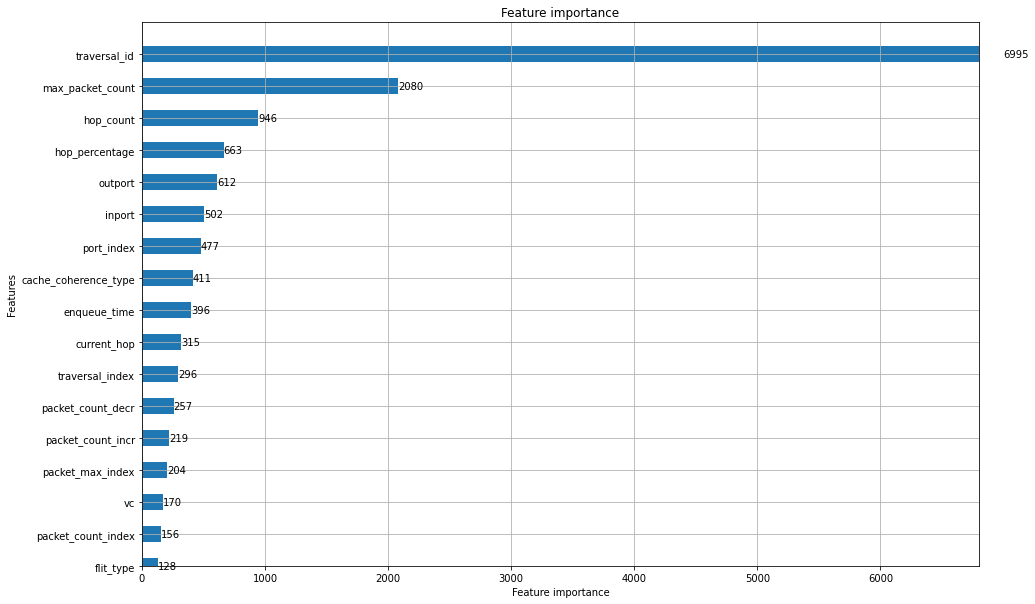

In [141]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [142]:
sorted(gbm.feature_importances_,reverse=True)

[6995,
 2080,
 946,
 663,
 612,
 502,
 477,
 411,
 396,
 315,
 296,
 257,
 219,
 204,
 170,
 156,
 128,
 52,
 51,
 27,
 23,
 19,
 1,
 0]

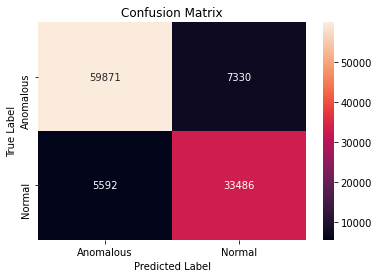

In [143]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [144]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     67201
           1       0.82      0.86      0.84     39078

    accuracy                           0.88    106279
   macro avg       0.87      0.87      0.87    106279
weighted avg       0.88      0.88      0.88    106279



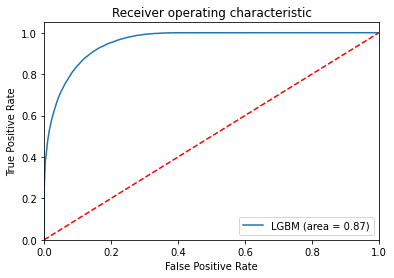

In [145]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()